In [23]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models,initializers

In [24]:
def func1(x_1, x_2):
    return 10 - 10*np.exp(-0.2*(x_1**2+ x_2**2)) -np.exp((np.cos(x_1)+np.cos(x_2))/2)

np.random.seed(0)
n = 1000
x_1 = np.arange(-10, 10, 0.1)
x_2 = np.arange(-10, 10, 0.1)

train_x = []
train_y = []
for i in range(n):
    x1 = np.random.uniform(-10.0,10.0)
    x2 = np.random.uniform(-10.0, 10.0)
    epsilon = np.random.uniform(-0.01, 0.01)
    train_x.append([x1, x2])
    train_y.append(func1(x1, x2) + epsilon)

train_x = np.array(train_x)
train_y = np.array(train_y)

model = models.Sequential() # 順番に層を積み重ねていく
model.add(layers.Dense(32, activation='relu', input_shape=(2,),
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='relu_1'))
model.add(layers.Dense(16, activation='relu',
                       name='relu_2')) 
model.add(layers.Dense(1, 
                       input_shape=(16,), 
                       name='last_layer'))
model.compile(optimizer='adam', loss='mse')
history = model.fit(train_x, train_y, batch_size=100, epochs=1000)

Epoch 1/1000
10/10 [==============================] - 0s 2ms/step - loss: 80.6334
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 75.0876
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 70.9885
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 67.4404
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 63.3607
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 58.5414
Epoch 7/1000
10/10 [==============================] - 0s 2ms/step - loss: 53.0372
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 46.8799
Epoch 9/1000
10/10 [==============================] - 0s 2ms/step - loss: 40.1994
Epoch 10/1000
10/10 [==============================] - 0s 2ms/step - loss: 33.1947
Epoch 11/1000
10/10 [==============================] - 0s 2ms/step - loss: 26.2919
Epoch 12/1000
10/10 [==============================] - 0s 3ms/step - loss: 19.8670
Epoch 13/1000

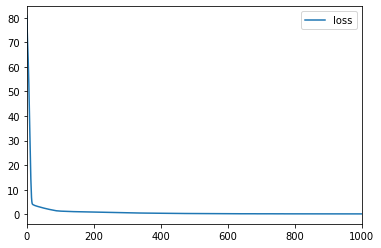

In [25]:
DataFrame({'loss': history.history['loss']}).plot(xlim=(0, 1000)) #end = epochs

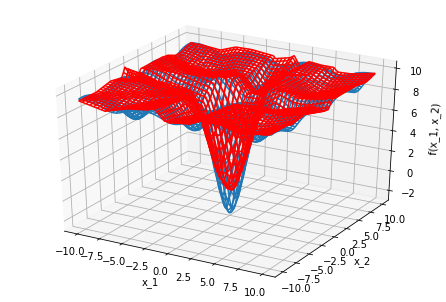

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

X, Y = np.meshgrid(x_1, x_2)
Z = func1(X, Y)
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x_1");  ax.set_ylabel("x_2"); ax.set_zlabel("f(x_1, x_2)")

ZhatX = []
for i in range(200):
  for j in range(200):
    ZhatX.append([-10.0+0.1*i, -10.0+0.1*j])
ZhatX = np.array(ZhatX)
Zhat = model.predict(ZhatX)
Zhat = Zhat.reshape(200,200)
ax.plot_wireframe(X,Y,Zhat,color='red')

ax.plot_wireframe(X, Y, Z)

plt.show()
